In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [5]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedShuffleSplit, StratifiedKFold

In [6]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
model_cvs = lgb.LGBMClassifier(**{'boosting_type': 'gbdt',
                                 'colsample_bytree': 1,
                                 'learning_rate': 0.01,
                                 'min_child_samples': 300,#100
                                 'n_estimators': 500,
                                'max_depth': 5,                                
                                 'num_leaves': 25,#60
                                 'subsample': 0.6,
                                'scale_pos_weight':1
                                      },n_jobs=1, metric="roc_auc", seed=123)

In [7]:
df = pd.read_csv("./dataset.csv", low_memory=False)

In [8]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    df.drop(["client_id", "open_account_flg"], axis=1), df["open_account_flg"], test_size=0.33, random_state=42)

In [8]:
%matplotlib inline 
cv = StratifiedKFold(n_splits=3, shuffle=True,random_state=123)

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
X= X_train_base
y = y_train_base
sss = StratifiedShuffleSplit(train_size = 0.6, test_size=0.4, random_state=123,n_splits=3)
import pandas as pd
for train_idx, test_idx in sss.split(X, y):
    
    X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
    model_cvs.fit(X_train, y_train)

    y_pred = model_cvs.predict_proba(X_test)
    train_ = model_cvs.predict_proba(X_train)
    print("binary roc train",roc_auc_score(y_train, train_[:,1]))
    print("binary roc",roc_auc_score(y_test, y_pred[:,1]))
    y_pred = model_cvs.predict(X_test)
    print("binary recall",recall_score(y_test, y_pred))
    print("binary f1",f1_score(y_test, y_pred))
    print("binary precision",precision_score(y_test, y_pred))
    print("+++++++++++++++++++++++++++++++++++++++")

binary roc train 0.7664090484174093
binary roc 0.7514179253121489
binary recall 0.05971998513195391
binary f1 0.10924750679963736
binary precision 0.6401062416998672
+++++++++++++++++++++++++++++++++++++++
binary roc train 0.7650526601924278
binary roc 0.7547994156204474
binary recall 0.05575517284103581
binary f1 0.1026108767529358
binary precision 0.6428571428571429
+++++++++++++++++++++++++++++++++++++++
binary roc train 0.7684018858247965
binary roc 0.7487772911849271
binary recall 0.05501177053648866
binary f1 0.10074880871341046
binary precision 0.5975773889636609
+++++++++++++++++++++++++++++++++++++++


In [9]:
%%time
model_cvs.fit(X_train_base, y_train_base)

CPU times: user 2.59 s, sys: 49.6 ms, total: 2.64 s
Wall time: 2.73 s


LGBMClassifier(colsample_bytree=1, learning_rate=0.01, max_depth=5,
               metric='roc_auc', min_child_samples=300, n_estimators=500,
               n_jobs=1, num_leaves=25, scale_pos_weight=1, seed=123,
               subsample=0.6)

In [30]:
pred = model_cvs.predict_proba(X_test_base)[:,1]

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_base, pred)
metrics.auc(fpr, tpr)

0.7565603150797457

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

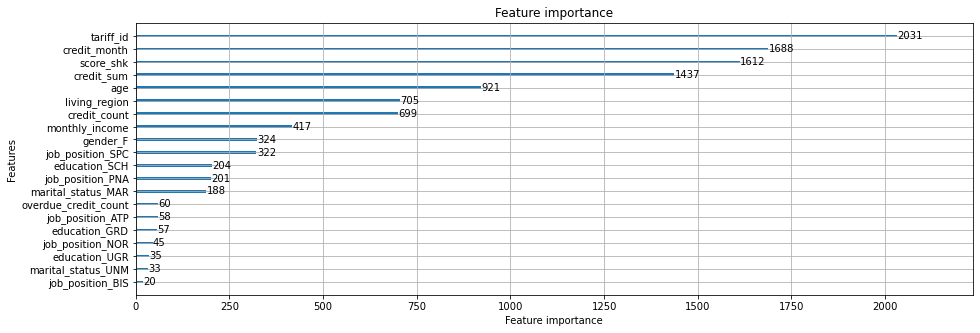

In [34]:
lgb.plot_importance(model_cvs, max_num_features=20,figsize=(15,5), importance_type='split')

In [50]:
def save_model(pathmodel, model):
    import pickle

    with open(pathmodel, "wb") as fout:
        pickle.dump(model, fout)

In [51]:
save_model("./models/lgb_model.pkl", model_cvs)

In [54]:
def load_model(pathmodel):
    with open(pathmodel, "rb") as fin:
        return pickle.load(fin)

In [55]:
m = load_model("models/lgb_model.pkl")

In [47]:
m.predict_proba(X_test_base)[:,1]

array([0.2192062 , 0.31000724, 0.09411681, ..., 0.19581971, 0.04522769,
       0.05135204])